In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
from vary import GaussianVAE, InformationBottlekneck
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
from altair import Chart

tf.logging.set_verbosity(tf.logging.INFO)

Using TensorFlow backend.


In [3]:
(X_train, y_train_label), (X_test, y_test_label) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train_label, 10)
y_test = np_utils.to_categorical(y_test_label, 10)

In [4]:
model = InformationBottlekneck(n_latent_dim=2, kl_weight=1e-3, n_iter=10, batch_size=64, n_jobs=-1)

In [5]:
model.fit(X_train, y_train)

INFO:tensorflow:Using config: {'task': 0, 'save_summary_steps': 100, 'keep_checkpoint_max': 5, '_is_chief': True, 'save_checkpoints_secs': 600, 'evaluation_master': '', 'tf_config': intra_op_parallelism_threads: 8
inter_op_parallelism_threads: 8
gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'master': '', 'keep_checkpoint_every_n_hours': 10000, '_job_name': None, 'cluster_spec': None, 'tf_random_seed': 123, 'num_ps_replicas': 0}
INFO:tensorflow:Setting feature info to TensorSignature(dtype=tf.float32, shape=TensorShape([Dimension(None), Dimension(784)]), is_sparse=False)
INFO:tensorflow:Setting targets info to TensorSignature(dtype=tf.float64, shape=TensorShape([Dimension(None), Dimension(10)]), is_sparse=False)


ValueError: Invalid reduction dimension 1 for input with 1 dimensions. for 'Sum' (op: 'Sum') with input shapes: [?], [].

In [31]:
z_latent = model.transform(X_test)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


[None, 10]


INFO:tensorflow:Loading model from checkpoint: /var/folders/pn/nwp0b4g12916lc2jgd1w28z00000gp/T/tmpcRu5DV/model.ckpt-9370-?????-of-00001.


In [32]:
data = pd.DataFrame({'x': z_latent[:, 0], 'y': z_latent[:, 1], 'label': y_test_label})

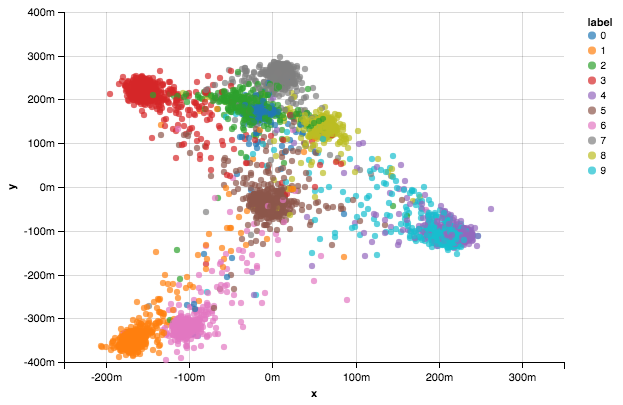

In [33]:
Chart(data).mark_circle().encode(
    x='x',
    y='y',
    color='label:N')